In [1]:
# Supervised learning using a feedforward network

In [321]:
# Get and preprocess the data according to our requirement
import pandas as pd
data = pd.read_csv('insurance.csv')
print('\n #Features = '+str(data.shape[1]))
print('\n #Samples = '+str(data.shape[0]))
data.head()


 #Features = 2

 #Samples = 63


,Number of claims,Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [385]:
# Following is the code for the training network.
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

torch.manual_seed(42)


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torch.nn.functional import normalize

dat = data.to_numpy(dtype= np.float32) # dataframe  to numpy 
x = torch.from_numpy(dat[:,[0]])
x = torch.nn.functional.normalize(x, p=2.0, dim = 0)
y = torch.from_numpy(dat[:,[1]])
train_size = int(0.6*len(dat))
test_size = len(dat)- train_size
x_train, x_test = torch.utils.data.random_split(x, [train_size, test_size])
y_train, y_test = torch.utils.data.random_split(y, [train_size, test_size])

class CustomDataset_train(Dataset):
    def __init__(self):
        self.x_train = x_train
        self.y_train = y_train
        self.num_samples = len(x_train)
        
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]

    def __len__(self):
        return self.num_samples

class CustomDataset_test(Dataset):

    def __init__(self):
        self.x_test = x_test
        self.y_test = y_test
        self.num_samples = len(x_test)

    def __getitem__(self, index):
        return self.x_test[index], self.y_test[index]

    def __len__(self):
        return self.num_samples

data_train = CustomDataset_train()
data_test = CustomDataset_test()
trainloader = DataLoader(dataset = data_train, batch_size=10, shuffle=True)
testloader = DataLoader(dataset = data_test, batch_size=10, shuffle=True)

In [396]:
import torch.nn as nn
input_size = x.shape[1]
output_size = y.shape[1]

# define network architecture
class myModel(nn.Module):
    def __init__(self,input_dim, output_dim, hidden_size1 =64, hidden_size2 = 64):
        super(myModel, self).__init__()
        #define network layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
      
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        return out
    
model = myModel(input_size, output_size)
print(model)

myModel(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [397]:
#define loss function, optimizer and hyperparameters
loss = nn.MSELoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
num_epochs = 2000
total_step = len(trainloader)

Epoch [1/2000], Step [3/4], Loss: 10119.2871
Epoch [2/2000], Step [3/4], Loss: 17959.9082
Epoch [3/2000], Step [3/4], Loss: 8387.0332
Epoch [4/2000], Step [3/4], Loss: 9323.0371
Epoch [5/2000], Step [3/4], Loss: 12089.6064
Epoch [6/2000], Step [3/4], Loss: 8349.1543
Epoch [7/2000], Step [3/4], Loss: 18611.0410
Epoch [8/2000], Step [3/4], Loss: 13080.7012
Epoch [9/2000], Step [3/4], Loss: 11253.0293
Epoch [10/2000], Step [3/4], Loss: 22647.2207
Epoch [11/2000], Step [3/4], Loss: 10854.6377
Epoch [12/2000], Step [3/4], Loss: 10373.9580
Epoch [13/2000], Step [3/4], Loss: 11433.7188
Epoch [14/2000], Step [3/4], Loss: 12966.7246
Epoch [15/2000], Step [3/4], Loss: 7617.3062
Epoch [16/2000], Step [3/4], Loss: 20669.3281
Epoch [17/2000], Step [3/4], Loss: 10465.7402
Epoch [18/2000], Step [3/4], Loss: 3261.6948
Epoch [19/2000], Step [3/4], Loss: 19486.6152
Epoch [20/2000], Step [3/4], Loss: 11821.7158
Epoch [21/2000], Step [3/4], Loss: 4946.1865
Epoch [22/2000], Step [3/4], Loss: 11572.1514
Epo

Epoch [179/2000], Step [3/4], Loss: 20083.1777
Epoch [180/2000], Step [3/4], Loss: 7414.9155
Epoch [181/2000], Step [3/4], Loss: 7981.7373
Epoch [182/2000], Step [3/4], Loss: 9922.5684
Epoch [183/2000], Step [3/4], Loss: 6436.3169
Epoch [184/2000], Step [3/4], Loss: 6066.5059
Epoch [185/2000], Step [3/4], Loss: 9462.6123
Epoch [186/2000], Step [3/4], Loss: 15061.4658
Epoch [187/2000], Step [3/4], Loss: 6677.4492
Epoch [188/2000], Step [3/4], Loss: 6634.9971
Epoch [189/2000], Step [3/4], Loss: 11082.0146
Epoch [190/2000], Step [3/4], Loss: 5377.7378
Epoch [191/2000], Step [3/4], Loss: 10205.9824
Epoch [192/2000], Step [3/4], Loss: 4910.2173
Epoch [193/2000], Step [3/4], Loss: 6487.0947
Epoch [194/2000], Step [3/4], Loss: 8276.3096
Epoch [195/2000], Step [3/4], Loss: 12541.1582
Epoch [196/2000], Step [3/4], Loss: 17503.2012
Epoch [197/2000], Step [3/4], Loss: 10352.5801
Epoch [198/2000], Step [3/4], Loss: 8047.8501
Epoch [199/2000], Step [3/4], Loss: 11221.9473
Epoch [200/2000], Step [3/

Epoch [361/2000], Step [3/4], Loss: 10232.2158
Epoch [362/2000], Step [3/4], Loss: 8849.0117
Epoch [363/2000], Step [3/4], Loss: 10666.4316
Epoch [364/2000], Step [3/4], Loss: 6476.1138
Epoch [365/2000], Step [3/4], Loss: 7210.1968
Epoch [366/2000], Step [3/4], Loss: 5079.2490
Epoch [367/2000], Step [3/4], Loss: 13339.7471
Epoch [368/2000], Step [3/4], Loss: 6545.5430
Epoch [369/2000], Step [3/4], Loss: 9331.1094
Epoch [370/2000], Step [3/4], Loss: 3810.5391
Epoch [371/2000], Step [3/4], Loss: 9524.8330
Epoch [372/2000], Step [3/4], Loss: 9524.3730
Epoch [373/2000], Step [3/4], Loss: 13254.4395
Epoch [374/2000], Step [3/4], Loss: 4688.7808
Epoch [375/2000], Step [3/4], Loss: 12550.3848
Epoch [376/2000], Step [3/4], Loss: 10438.3955
Epoch [377/2000], Step [3/4], Loss: 3709.6812
Epoch [378/2000], Step [3/4], Loss: 14460.5566
Epoch [379/2000], Step [3/4], Loss: 8387.3252
Epoch [380/2000], Step [3/4], Loss: 7172.8408
Epoch [381/2000], Step [3/4], Loss: 7221.0537
Epoch [382/2000], Step [3/4

Epoch [541/2000], Step [3/4], Loss: 5337.1104
Epoch [542/2000], Step [3/4], Loss: 1414.5714
Epoch [543/2000], Step [3/4], Loss: 4650.2842
Epoch [544/2000], Step [3/4], Loss: 6505.2344
Epoch [545/2000], Step [3/4], Loss: 3386.3132
Epoch [546/2000], Step [3/4], Loss: 5261.6260
Epoch [547/2000], Step [3/4], Loss: 2245.6482
Epoch [548/2000], Step [3/4], Loss: 5776.0815
Epoch [549/2000], Step [3/4], Loss: 4394.9907
Epoch [550/2000], Step [3/4], Loss: 5013.3877
Epoch [551/2000], Step [3/4], Loss: 2941.0073
Epoch [552/2000], Step [3/4], Loss: 3635.4500
Epoch [553/2000], Step [3/4], Loss: 4927.7983
Epoch [554/2000], Step [3/4], Loss: 3746.0156
Epoch [555/2000], Step [3/4], Loss: 7454.2993
Epoch [556/2000], Step [3/4], Loss: 8232.6650
Epoch [557/2000], Step [3/4], Loss: 6992.7705
Epoch [558/2000], Step [3/4], Loss: 8648.6084
Epoch [559/2000], Step [3/4], Loss: 11157.6582
Epoch [560/2000], Step [3/4], Loss: 4634.2935
Epoch [561/2000], Step [3/4], Loss: 6438.4092
Epoch [562/2000], Step [3/4], Los

Epoch [748/2000], Step [3/4], Loss: 5958.1616
Epoch [749/2000], Step [3/4], Loss: 7797.3960
Epoch [750/2000], Step [3/4], Loss: 3139.8569
Epoch [751/2000], Step [3/4], Loss: 1223.6417
Epoch [752/2000], Step [3/4], Loss: 2543.2751
Epoch [753/2000], Step [3/4], Loss: 4334.0801
Epoch [754/2000], Step [3/4], Loss: 2031.1754
Epoch [755/2000], Step [3/4], Loss: 5106.0942
Epoch [756/2000], Step [3/4], Loss: 4431.4976
Epoch [757/2000], Step [3/4], Loss: 1408.5891
Epoch [758/2000], Step [3/4], Loss: 4555.8257
Epoch [759/2000], Step [3/4], Loss: 1929.8350
Epoch [760/2000], Step [3/4], Loss: 7307.9360
Epoch [761/2000], Step [3/4], Loss: 5034.8506
Epoch [762/2000], Step [3/4], Loss: 1770.8705
Epoch [763/2000], Step [3/4], Loss: 2775.5803
Epoch [764/2000], Step [3/4], Loss: 3835.3816
Epoch [765/2000], Step [3/4], Loss: 3980.6855
Epoch [766/2000], Step [3/4], Loss: 1817.2670
Epoch [767/2000], Step [3/4], Loss: 2937.3276
Epoch [768/2000], Step [3/4], Loss: 5993.3633
Epoch [769/2000], Step [3/4], Loss

Epoch [956/2000], Step [3/4], Loss: 2058.7488
Epoch [957/2000], Step [3/4], Loss: 5037.5645
Epoch [958/2000], Step [3/4], Loss: 3102.7749
Epoch [959/2000], Step [3/4], Loss: 6174.5464
Epoch [960/2000], Step [3/4], Loss: 5713.7378
Epoch [961/2000], Step [3/4], Loss: 3033.7388
Epoch [962/2000], Step [3/4], Loss: 5352.5415
Epoch [963/2000], Step [3/4], Loss: 4511.5244
Epoch [964/2000], Step [3/4], Loss: 5064.5171
Epoch [965/2000], Step [3/4], Loss: 4530.0967
Epoch [966/2000], Step [3/4], Loss: 3327.1841
Epoch [967/2000], Step [3/4], Loss: 5652.6587
Epoch [968/2000], Step [3/4], Loss: 2298.1685
Epoch [969/2000], Step [3/4], Loss: 2740.0544
Epoch [970/2000], Step [3/4], Loss: 5508.2031
Epoch [971/2000], Step [3/4], Loss: 2529.7827
Epoch [972/2000], Step [3/4], Loss: 7148.8843
Epoch [973/2000], Step [3/4], Loss: 4196.8853
Epoch [974/2000], Step [3/4], Loss: 6763.0874
Epoch [975/2000], Step [3/4], Loss: 5343.6455
Epoch [976/2000], Step [3/4], Loss: 3971.0337
Epoch [977/2000], Step [3/4], Loss

Epoch [1132/2000], Step [3/4], Loss: 4241.9912
Epoch [1133/2000], Step [3/4], Loss: 4373.2354
Epoch [1134/2000], Step [3/4], Loss: 2597.9692
Epoch [1135/2000], Step [3/4], Loss: 3482.5957
Epoch [1136/2000], Step [3/4], Loss: 3305.3765
Epoch [1137/2000], Step [3/4], Loss: 5305.6865
Epoch [1138/2000], Step [3/4], Loss: 5229.4238
Epoch [1139/2000], Step [3/4], Loss: 6141.8291
Epoch [1140/2000], Step [3/4], Loss: 4943.0869
Epoch [1141/2000], Step [3/4], Loss: 3943.4207
Epoch [1142/2000], Step [3/4], Loss: 3165.7505
Epoch [1143/2000], Step [3/4], Loss: 4275.6025
Epoch [1144/2000], Step [3/4], Loss: 5662.6890
Epoch [1145/2000], Step [3/4], Loss: 4840.7349
Epoch [1146/2000], Step [3/4], Loss: 4266.5596
Epoch [1147/2000], Step [3/4], Loss: 7922.8892
Epoch [1148/2000], Step [3/4], Loss: 4531.2725
Epoch [1149/2000], Step [3/4], Loss: 2006.6471
Epoch [1150/2000], Step [3/4], Loss: 4173.7095
Epoch [1151/2000], Step [3/4], Loss: 2718.3032
Epoch [1152/2000], Step [3/4], Loss: 1536.6633
Epoch [1153/2

Epoch [1308/2000], Step [3/4], Loss: 3957.4702
Epoch [1309/2000], Step [3/4], Loss: 2207.8308
Epoch [1310/2000], Step [3/4], Loss: 2110.0239
Epoch [1311/2000], Step [3/4], Loss: 2593.1555
Epoch [1312/2000], Step [3/4], Loss: 7689.7529
Epoch [1313/2000], Step [3/4], Loss: 5601.2339
Epoch [1314/2000], Step [3/4], Loss: 4000.8992
Epoch [1315/2000], Step [3/4], Loss: 3763.3315
Epoch [1316/2000], Step [3/4], Loss: 5641.1084
Epoch [1317/2000], Step [3/4], Loss: 3104.2036
Epoch [1318/2000], Step [3/4], Loss: 3994.4663
Epoch [1319/2000], Step [3/4], Loss: 3791.4692
Epoch [1320/2000], Step [3/4], Loss: 5065.3218
Epoch [1321/2000], Step [3/4], Loss: 2282.3647
Epoch [1322/2000], Step [3/4], Loss: 6515.2134
Epoch [1323/2000], Step [3/4], Loss: 2939.9536
Epoch [1324/2000], Step [3/4], Loss: 4064.2378
Epoch [1325/2000], Step [3/4], Loss: 2650.1780
Epoch [1326/2000], Step [3/4], Loss: 3230.8240
Epoch [1327/2000], Step [3/4], Loss: 4354.2754
Epoch [1328/2000], Step [3/4], Loss: 2668.1968
Epoch [1329/2

Epoch [1485/2000], Step [3/4], Loss: 6770.8569
Epoch [1486/2000], Step [3/4], Loss: 6837.1313
Epoch [1487/2000], Step [3/4], Loss: 1942.6176
Epoch [1488/2000], Step [3/4], Loss: 5202.4248
Epoch [1489/2000], Step [3/4], Loss: 7721.0889
Epoch [1490/2000], Step [3/4], Loss: 3075.4563
Epoch [1491/2000], Step [3/4], Loss: 6617.9321
Epoch [1492/2000], Step [3/4], Loss: 3520.9895
Epoch [1493/2000], Step [3/4], Loss: 4021.6978
Epoch [1494/2000], Step [3/4], Loss: 5944.5938
Epoch [1495/2000], Step [3/4], Loss: 3218.5298
Epoch [1496/2000], Step [3/4], Loss: 3852.9126
Epoch [1497/2000], Step [3/4], Loss: 3928.5103
Epoch [1498/2000], Step [3/4], Loss: 3804.9661
Epoch [1499/2000], Step [3/4], Loss: 4476.4814
Epoch [1500/2000], Step [3/4], Loss: 3630.6870
Epoch [1501/2000], Step [3/4], Loss: 3645.5605
Epoch [1502/2000], Step [3/4], Loss: 2662.4414
Epoch [1503/2000], Step [3/4], Loss: 7738.6924
Epoch [1504/2000], Step [3/4], Loss: 6939.3359
Epoch [1505/2000], Step [3/4], Loss: 2808.5610
Epoch [1506/2

Epoch [1667/2000], Step [3/4], Loss: 4884.8984
Epoch [1668/2000], Step [3/4], Loss: 5956.6646
Epoch [1669/2000], Step [3/4], Loss: 2006.2682
Epoch [1670/2000], Step [3/4], Loss: 5013.7300
Epoch [1671/2000], Step [3/4], Loss: 3884.6699
Epoch [1672/2000], Step [3/4], Loss: 4533.9541
Epoch [1673/2000], Step [3/4], Loss: 5411.3882
Epoch [1674/2000], Step [3/4], Loss: 3953.1003
Epoch [1675/2000], Step [3/4], Loss: 6667.5796
Epoch [1676/2000], Step [3/4], Loss: 3314.3052
Epoch [1677/2000], Step [3/4], Loss: 3937.4985
Epoch [1678/2000], Step [3/4], Loss: 5810.9512
Epoch [1679/2000], Step [3/4], Loss: 3536.9766
Epoch [1680/2000], Step [3/4], Loss: 7498.7095
Epoch [1681/2000], Step [3/4], Loss: 6796.2563
Epoch [1682/2000], Step [3/4], Loss: 4633.1079
Epoch [1683/2000], Step [3/4], Loss: 6175.2075
Epoch [1684/2000], Step [3/4], Loss: 4308.8032
Epoch [1685/2000], Step [3/4], Loss: 2767.2544
Epoch [1686/2000], Step [3/4], Loss: 3742.0149
Epoch [1687/2000], Step [3/4], Loss: 5540.3218
Epoch [1688/2

Epoch [1846/2000], Step [3/4], Loss: 3950.5249
Epoch [1847/2000], Step [3/4], Loss: 3966.3862
Epoch [1848/2000], Step [3/4], Loss: 2268.0381
Epoch [1849/2000], Step [3/4], Loss: 6597.9219
Epoch [1850/2000], Step [3/4], Loss: 3157.8413
Epoch [1851/2000], Step [3/4], Loss: 6403.6567
Epoch [1852/2000], Step [3/4], Loss: 2995.8062
Epoch [1853/2000], Step [3/4], Loss: 2351.9312
Epoch [1854/2000], Step [3/4], Loss: 5928.9414
Epoch [1855/2000], Step [3/4], Loss: 4940.2715
Epoch [1856/2000], Step [3/4], Loss: 2966.1040
Epoch [1857/2000], Step [3/4], Loss: 5358.7852
Epoch [1858/2000], Step [3/4], Loss: 4478.5259
Epoch [1859/2000], Step [3/4], Loss: 4570.7925
Epoch [1860/2000], Step [3/4], Loss: 4078.9011
Epoch [1861/2000], Step [3/4], Loss: 3128.8992
Epoch [1862/2000], Step [3/4], Loss: 4669.4292
Epoch [1863/2000], Step [3/4], Loss: 7297.3477
Epoch [1864/2000], Step [3/4], Loss: 2067.1721
Epoch [1865/2000], Step [3/4], Loss: 2191.4856
Epoch [1866/2000], Step [3/4], Loss: 2539.7017
Epoch [1867/2

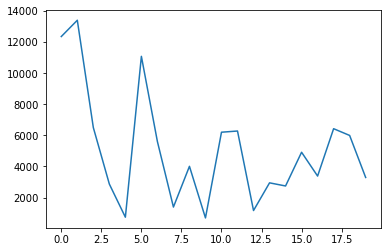

In [398]:
los_list = []
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(trainloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        y_pred = model(inputs)
        l = loss(y_pred, labels)
        
        # Backward pass and optimize
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 3 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, l.item()))
    
    if epoch%100 ==0:
        los_list.append(l)
        
ep = np.arange(len(los_list))
plt.plot(ep,los_list)

In [382]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
loss_test = []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        pred = model(inputs)
        lo = loss(pred, labels)
    print("\n In: %s \n targ: %s \n pred: %s " %(inputs, labels, predicted))



 In: tensor([[0.2127],
        [0.0155],
        [0.4177],
        [0.0271],
        [0.1547],
        [0.0155]]) 
 targ: tensor([[103.9000],
        [217.6000],
        [392.5000],
        [ 14.6000],
        [ 38.1000],
        [ 77.5000]]) 
 pred: tensor([[ 94.6669],
        [151.1425],
        [ 95.7796],
        [106.3091],
        [134.5626],
        [151.1425]]) 
